In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time

In [2]:
print(f'np version {np.__version__}\n')

np version 1.23.5



### Floating points
what is a zero in the computer? when doing computer computations?

In [12]:
print("Case No.1")
x = 0.1
y = 0.2
z = 0.3
bool = 0.1 + 0.2 == 0.3
print(f'{x} + {y} == {z} ? {bool}, although we expected {not bool}')
print(f'{x} + {y} = {x+y} != {z}')

print("Case No.2")
x = 0.8
y = 0.1
z = 0.7
bool = 0.8 - 0.1 > 0.7
print(f'{x} - {y} > {z} ? {bool}, although we expected {not bool}')
print(f'{x} - {y} = {x-y} > {z}')

Case No.1
0.1 + 0.2 == 0.3 ? False, although we expected True
0.1 + 0.2 = 0.30000000000000004 != 0.3
Case No.2
0.8 - 0.1 > 0.7 ? True, although we expected False
0.8 - 0.1 = 0.7000000000000001 > 0.7


we typically have floating point representation errors

In [13]:
print('0.1 = {:.17g}, 0.2 = {:.17g}, 0.3 = {:.17g}'.format(0.1, 0.2, 0.3))
print(np.abs(0.1+0.2 - 0.3))

0.1 = 0.10000000000000001, 0.2 = 0.20000000000000001, 0.3 = 0.29999999999999999
5.551115123125783e-17


So, in this case, $ 0.1 + 0.2 \neq 0.3 $.

The math.isclose() function in Python is used to check if two floating-point numbers are approximately equal within a specified tolerance. The abs_tol parameter allows you to set a custom absolute tolerance value for the comparison. This tolerance is used to determine how close the numbers need to be to be considered "close enough."

כלומר, אנחנו מגדירים את רמת הקירבה בין שני מספרים כך שהמחשב יתיחס אליהם כשווים.

In [15]:
def isclose(a, b, rel_tol=1e-09, abs_tol=0.0):
    return abs(a-b) <= max(rel_tol * max(abs(a), abs(b)), abs_tol)

##### Single/double precision

Single and double precision are terms used to describe the precision or the number of bits used to represent floating-point numbers in a computer's memory. These terms are commonly associated with floating-point data types used in computer programming and scientific computation.

כלומר, מה מספר הביטים המייצגים.
בדיוק יחיד, יש 32 ביטים לייצוג. ישנן בערך 7 ספרות מדויקות אחרי הנקודה. 
בדיוק כפול, יש 64 ביטים לייצוג. ישנן בערך 15-16 ספרות אחרי הנקודה.


In [16]:
a = np.array(0.1)     # double precision
a2 = a.astype(np.float32)

print(isclose(a,a2))

False


### Lists vs. arrays
Lists are essentially arrays of pointers; thus, every object can be located at a different memory location.
Arrays on the other hand, are optimized to store information in the same chunk of memory (homogenous)

In [26]:
print(f'\nLists vs. Arrays')
print()

ll = [1, 2, 3]
aa = np.array(ll)

print("list replication - multiply list by a scalar")
print(f'list before: {ll}')
ll = 2 * ll
print(f'list after: {ll}')
print()
print("multiply array by a scalar")
print(f'array before: {aa}')
aa = 2 * aa 
print(f'array after: {aa}')


Lists vs. Arrays

list replication - multiply list by a scalar
list before: [1, 2, 3]
list after: [1, 2, 3, 1, 2, 3]

multiply array by a scalar
array before: [1 2 3]
array after: [2 4 6]


### 1D and 2D arrays

In [30]:
print(f'\n1D and 2D arrays')
print()

aa = np.array([1, 2, 3, 4], dtype=np.float32)
aa2 = np.arange(5)
aa3 = np.linspace(0, 1, 5) # [0,1] with 5 points (devided to 5-1=4).

print(f'aa: {aa}')
print(f'aa2: {aa2}')
print(f'aa3: {aa3}')
print()

# numpy is row major, i.e., matrices are generated in row-major order
AA = np.array([[1, 2, 3], [4, 5, 6]], dtype=np.float32)
AA2 = np.random.rand(2, 3) # arguments are the size.
AA3 = np.eye(3) # generate ID matrix.

print('AA:')
print(AA)
print('AA2:')
print(AA2)
print('AA3:')
print(AA3)


1D and 2D arrays

aa: [1. 2. 3. 4.]
aa2: [0 1 2 3 4]
aa3: [0.   0.25 0.5  0.75 1.  ]

AA:
[[1. 2. 3.]
 [4. 5. 6.]]
AA2:
[[0.41857276 0.95353396 0.11307623]
 [0.26976737 0.54910242 0.69105104]]
AA3:
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


### Shape of arrays: shape, size, reshape, flatten, transpose
1. Shape is the numbers of rows and columns.
2. Size is the number of overall cells.
3. Reshape changes the numbers of rows and columns. But, the order of the cell from top left is preserved.
    When reshape, the number of cells (size)  should be kept and the arguments must divide the overall size. We can put -1 in the argument insted of being specific.
4. Flatten change the matrix into a vector. the numbers in the vector are order according to the matrix from top left.
5. Transpose.


In [51]:
print(f'\nShape of arrays')
print()

print(f'Shape of AA: {AA.shape}, rows={AA.shape[0]}, columns={AA.shape[1]}')
print(f'Size of AA: {AA.size}')
print()

print('AA:')
print(AA)
print()

AAr = np.reshape(AA, (3, 2))
print(f'reshaped AA (AAr):')
print(AAr)
print()

AAr2 = np.reshape(AA, (3, -1))
print(f'reshaped AA (AAr2):')
print(AAr2) 
print()  

AAr3 = AA.flatten()
print(f'after flat AA: {AAr3}')
print()

AAr4 = AA.ravel()
print(f'after ravel AA: {AAr4}')
print()

AAt = AA.T
print('transpose AA :')
print(AAt)


Shape of arrays

Shape of AA: (2, 3), rows=2, columns=3
Size of AA: 6

AA:
[[1. 0. 3.]
 [4. 5. 6.]]

after flat AA: [1. 0. 3. 4. 5. 6.]

after ravel AA: [1. 0. 3. 4. 5. 6.]

after flat AA: [1. 0. 3. 4. 5. 6.]
after ravel AA: [1. 0. 3. 4. 5. 6.]
transpose AA :
[[1. 4.]
 [0. 5.]
 [3. 6.]]


### Slicing 1D & 2D arrays

In [62]:
print(f'\nSlicing 1D and 2D arrays')
print()

aa = np.array([1, 2, 3, 4, 5, 6])
print(f'array aa = {aa}')
print()
print(f'sliced array aa[1:5:2] = {aa[1:5:2]}')  # start:end:step, end index excluded
print()
print(f'negative slicing aa[-1] = {aa[-1]}') # value of the last cell
print()

AA = np.array([[1, 2, 3], [4, 5, 6]])
print('array AA:')
print(AA)
print()
print(f'AA[0,0] = {AA[0,0]}')
print()
print('Second column values [:, 1::2]:')
print(AA[:,1::2])
print()
print(f'Arbitrary values [0:1, 1:3]: {AA[0:1,1:3]}') # only row number 0, column number 1,2


Slicing 1D and 2D arrays

array aa = [1 2 3 4 5 6]

sliced array aa[1:5:2] = [2 4]

negative slicing aa[-1] = 6

array AA:
[[1 2 3]
 [4 5 6]]

AA[0,0] = 1

Second column values [:, 1::2]:
[[2]
 [5]]

Arbitrary values [0:1, 1:3]: [[2 3]]


### Broadcasting

In [72]:
aa = np.array([1.0, 2.0, 3.0])
bb = np.array([2.0, 2.0, 2.0])
print(f'aa = {aa}')
print(f'bb = {bb}')
print(f'aa * bb = {aa*bb}')
print()

aa = np.array([[ 0.0,  0.0,  0.0],
               [10.0, 10.0, 10.0],
               [20.0, 20.0, 20.0],
               [30.0, 30.0, 30.0]])
bb = np.array([1.0, 2.0, 3.0])
print('aa =')
print(aa)
print(f'bb = {bb}')
print()

print('aa + bb =')
print(aa + bb.T)
print()

bb = np.array([1.0, 2.0, 3.0, 4.0])
# print(f'aa + bb = {aa + bb}')			# should give a broadcasting error

aa = np.array([0.0, 10.0, 20.0, 30.0])
bb = np.array([1.0, 2.0, 3.0])
print(f'aa = {aa}')
print(f'bb = {bb}')
print()

print('aa + bb =')
print(aa[:, np.newaxis] + bb)

aa = [1. 2. 3.]
bb = [2. 2. 2.]
aa * bb = [2. 4. 6.]

aa =
[[ 0.  0.  0.]
 [10. 10. 10.]
 [20. 20. 20.]
 [30. 30. 30.]]
bb = [1. 2. 3.]

aa + bb =
[[ 1.  2.  3.]
 [11. 12. 13.]
 [21. 22. 23.]
 [31. 32. 33.]]

aa = [ 0. 10. 20. 30.]
bb = [1. 2. 3.]

aa + bb =
[[ 1.  2.  3.]
 [11. 12. 13.]
 [21. 22. 23.]
 [31. 32. 33.]]


### Randomness

In [81]:
np.random.seed(1)

a1 = np.random.randint(100, size=1)
a2 = np.random.randint(100, size=1)

np.random.seed(2)

b1 = np.random.randint(100, size=1)
b2 = np.random.randint(100, size=1)
print(f'random numbers: a1 = {a1}, a2 = {a2}, b1 = {b1}, b2 = {b2}')

random numbers: a1 = [72], a2 = [12], b1 = [40], b2 = [15]


### Vector-matrix operations

In [91]:
mm, nn, oo = 5, 4, 3
AA = np.random.rand(mm, nn) # random matrix of size mmxnn
print(AA)
print()
print(f'AA.T = {AA.T}')
print()

aa, bb = np.random.rand(8), np.random.rand(8) # 8 enterances vector.
print (f'aa = {aa}')
print (f'bb = {bb}')
print()

print('<a, b> = {:.4f}'.format(aa @ bb))
print()

print('a * b = {:}'.format(aa * bb))
print()


[[0.46421235 0.41466826 0.29133772 0.32352851]
 [0.21159758 0.28026829 0.11710504 0.68925187]
 [0.64452619 0.3115294  0.88029896 0.38637573]
 [0.6110893  0.52316933 0.3250568  0.92979042]
 [0.84820141 0.84112295 0.95428864 0.00248243]]

AA.T = [[0.46421235 0.21159758 0.64452619 0.6110893  0.84820141]
 [0.41466826 0.28026829 0.3115294  0.52316933 0.84112295]
 [0.29133772 0.11710504 0.88029896 0.3250568  0.95428864]
 [0.32352851 0.68925187 0.38637573 0.92979042 0.00248243]]

aa = [0.4921191  0.93791312 0.13442676 0.24499414 0.50506192 0.67842151
 0.33275996 0.30636467]
bb = [0.77579791 0.03285394 0.78579786 0.42854028 0.62900946 0.70550302
 0.09846863 0.90384616]

<a, b> = 1.7292

a * b = [0.38178497 0.03081414 0.10563226 0.10498986 0.31768872 0.47862843
 0.03276642 0.27690653]



In [92]:
BB = np.random.rand(nn, oo)

start1 = time.time()
CC1 = AA @ BB
end1 = time.time()

start2 = time.time()
CC2 = np.zeros((mm, oo))
for ii in range(mm):
    for jj in range(oo):
        for kk in range(nn):
            CC2[ii, jj] += AA[ii, kk] * BB[kk, jj]
end2 = time.time()
print('HW-based time = {:.3e}, SW-based time = {:.3e}, diff = {:.3e}'.format(end1-start1, end2-start2, np.linalg.norm(CC1-CC2)))


HW-based time = 0.000e+00, SW-based time = 1.037e-03, diff = 1.360e-16


### Matrix inverse

calculate $|AA^{-1} -I|_F $

In [97]:
AA = np.random.rand(2, 2)
AAI = np.linalg.inv(AA)
print("AA:")
print(AA)
print("AAI:")
print(AAI)
print()

print('|AA @ AAI - I|_F = {:.3e}'.format(np.linalg.norm(AA @ AAI - np.eye(2))))
print()

# convert to float32 and show diff
AA2 = AA.astype(np.float32)
AAI2 = np.linalg.inv(AA2)
print('|AA2 @ AAI2 - I|_F = {:.3e}'.format(np.linalg.norm(AA2 @ AAI2 - np.eye(2))))

AA:
[[0.01875815 0.09163641]
 [0.34120996 0.22030166]]
AAI:
[[-8.11878507  3.3770801 ]
 [12.57462329 -0.69129468]]

|AA @ AAI - I|_F = 6.011e-17

|AA2 @ AAI2 - I|_F = 1.955e-07


### Matrix decompositions


##### Eigendecomposing

calculate $ |A - (V\cdot\Delta\cdot V^{-1})|_F $ 
where $V\cdot\Delta\cdot V^{-1}$ is the eigendecomposing of $A$

plot the eigenvalues of AA in the complex plane. the blue is the unit circle. This visualization can be helpful in understanding the distribution of eigenvalues.

##### SVD

calculate $ |A - (U\cdot D \cdot V^{T})|_F $ 
where $U\cdot D \cdot V^{T}$ is the SVD of $A$

plot the singular values of AA.

performing an analysis of the approximation error when reconstructing the original matrix AA using truncated SVD. useful for understanding how well the approximation of the original matrix AA using truncated SVD converges as more singular vectors are included in the approximation

dd shape = (50,), VV shape = (50, 50)

dd dtype = complex128, VV dtype = complex128

AA - VV @ diag(DD) @ inv(VV) = 2.071e-13



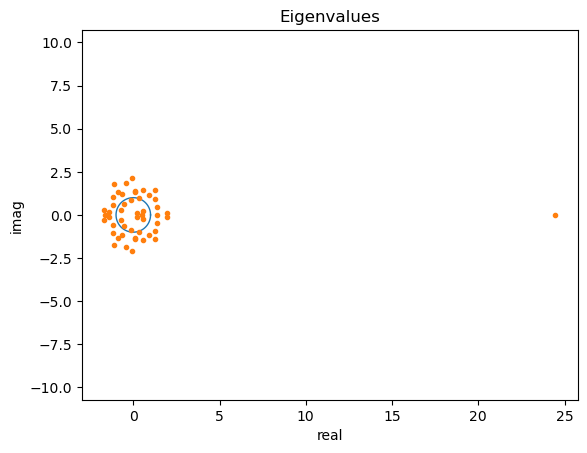

|AA - UU @ diag(ss) @ VVt| = 5.134e-14


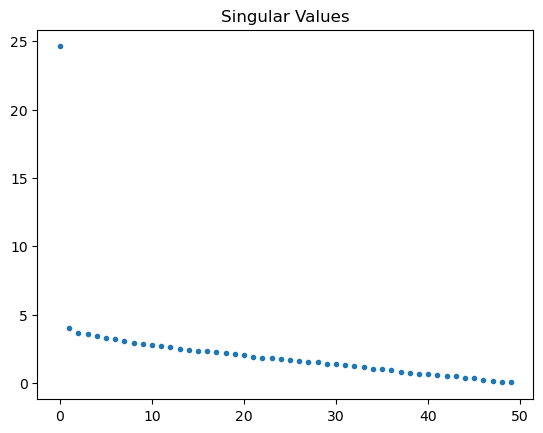

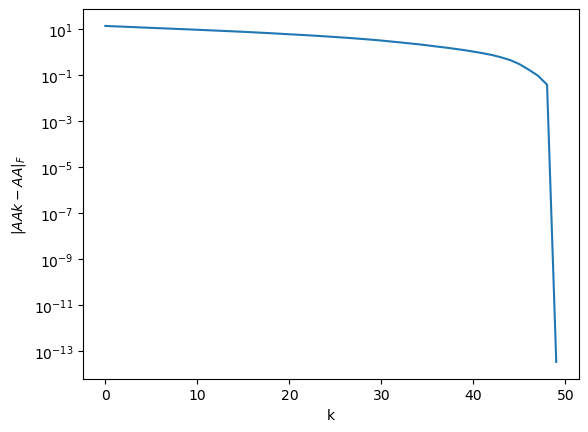

In [111]:
mm = 50
AA = np.random.rand(mm, mm)

dd, VV = np.linalg.eig(AA)
# dd - array that stores the eigenvalues.
# W - matrix that stores the correspondes eigenvectors. Each columns is a vector.
print('dd shape = {}, VV shape = {}'.format(dd.shape, VV.shape))
print()
print('dd dtype = {}, VV dtype = {}'.format(dd.dtype, VV.dtype))
print()

print('AA - VV @ diag(DD) @ inv(VV) = {:.3e}'.format(np.linalg.norm(AA - VV @ np.diag(dd) @ np.linalg.inv(VV))))
print()

# print the eigenvalues of AA in the complex plane. the blue is the unit circle. This visualization can be helpful in understanding the distribution of eigenvalues
t = np.linspace(0, np.pi*2, 100)
plt.plot(np.cos(t), np.sin(t), linewidth=1)
plt.plot(np.real(dd), np.imag(dd), '.')
plt.xlabel('real')
plt.ylabel('imag')
plt.title('Eigenvalues')
plt.gca().axis('equal')
plt.show()

UU, ss, VVt = np.linalg.svd(AA)
print('|AA - UU @ diag(ss) @ VVt| = {:.3e}'.format(np.linalg.norm(AA - UU @ np.diag(ss) @ VVt)))

plt.plot(ss, '.')
plt.title('Singular Values')
plt.show()

# approximate matrix
err = np.zeros(mm)
for kk in range(mm):
    UUk = UU[:, :kk+1]
    AAk = UUk @ (UUk.T @ AA)
    # AAk = UU[:, :kk] @ np.diag(ss[:kk]) @ VVt[:kk]
    err[kk] = np.linalg.norm(AAk-AA)

plt.plot(err)
plt.xlabel('k')
plt.ylabel('$|AAk-AA|_F$')
plt.yscale('log')
plt.show()
